#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

<Axes: ylabel='Frequency'>

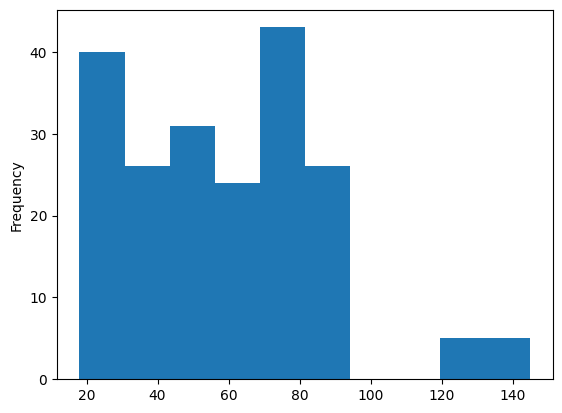

In [106]:
import pandas as pd
df= pd. read_csv ("../data/sample_data_with_outliers.csv")
df.head()

#import seaborn as sns
#sns.boxplot (df)

#df.plot.
#df. plot.hist.(subject.)
df["Age"].plot.hist()

<Axes: ylabel='Frequency'>

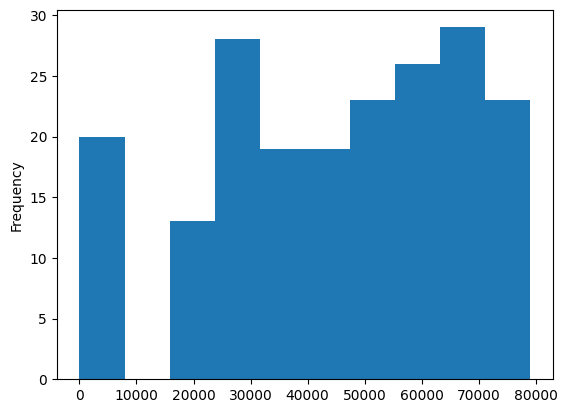

In [ ]:
df["Income"].plot.hist()


Original Data:
     Age  Income  Purchase  outlier  outlier_income
0     76   75071         1        1               1
1     88   62405         0        1               1
2     82   61914         1        1               1
3     81   66843         1        1               1
4     62   30492         0        1               1
..   ...     ...       ...      ...             ...
195   61   60764         1        1               1
196   64   49855         1        1               1
197   46   24735         0        1               1
198   29   60864         1       -1               1
199   64   68354         1        1               1

[200 rows x 5 columns]

Filtered Data (outliers removed):
     Age  Income  Purchase  outlier  outlier_income
0     76   75071         1        1               1
1     88   62405         0        1               1
2     82   61914         1        1               1
3     81   66843         1        1               1
4     62   30492         0        1       

<Axes: ylabel='Frequency'>

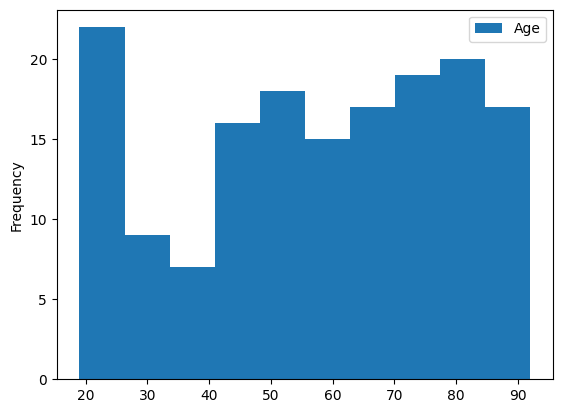

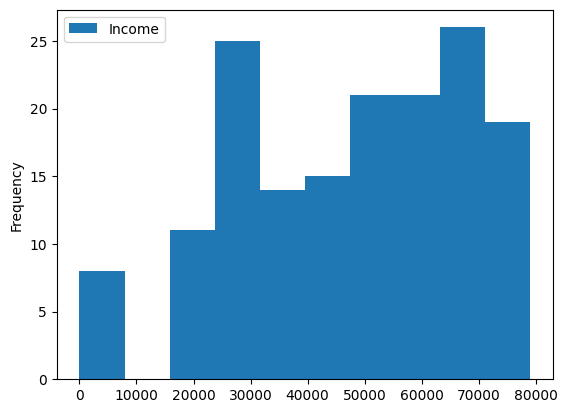

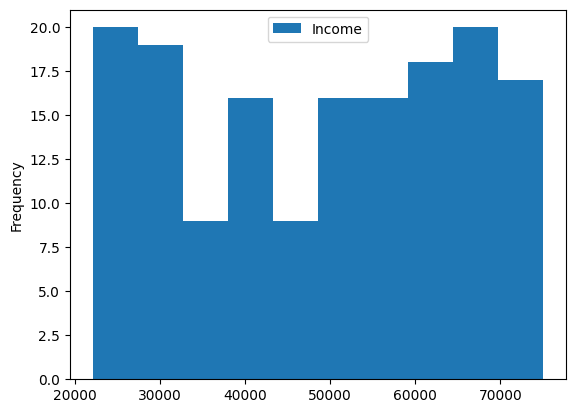

In [108]:
from sklearn.ensemble import IsolationForest
# Create the model

iso = IsolationForest(
    contamination=0.20,   # remove top 20% most "outlier-like" points
    random_state=42
)

# Fit the model on the feature(s) you want (e.g., 'age')
iso.fit(df[["Age"]]) # iso.fit(df[["age"]])

# Predict: 1 = inlier, -1 = outlier
df["outlier"] = iso.predict(df[["Age"]]) # df["outlier"] = iso.predict(df[["age"]])

# Fit model for income
iso.fit(df[["Income"]]) #KL
df["outlier_income"] = iso.predict(df[["Income"]]) #KL

# Filter to keep only inliers
df_filtered = df[df["outlier"] == 1]
df_filtered_income = df[df["outlier_income"] == 1] #KL

print("Original Data:")
print(df)
print("\nFiltered Data (outliers removed):")
print(df_filtered)
df_filtered.plot.hist(column="Age")
df_filtered.plot.hist(column="Income") #KL This one does not work because df_filtered was determined based on Age
df_filtered_income.plot.hist(column="Income") #KL


#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

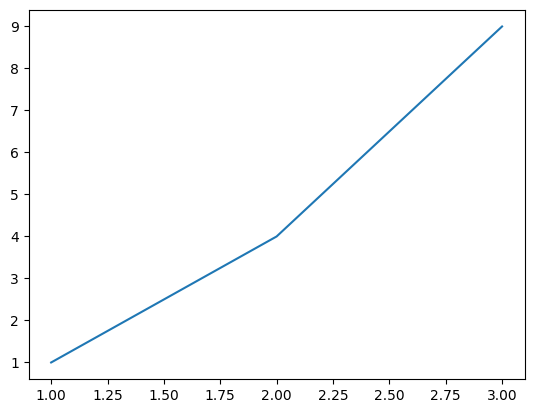

In [109]:


import matplotlib.pyplot as plt
plt.plot([1,2,3], [1,4,9])
plt.show()

Logistic Regression without Scaling - Test Accuracy: 0.85


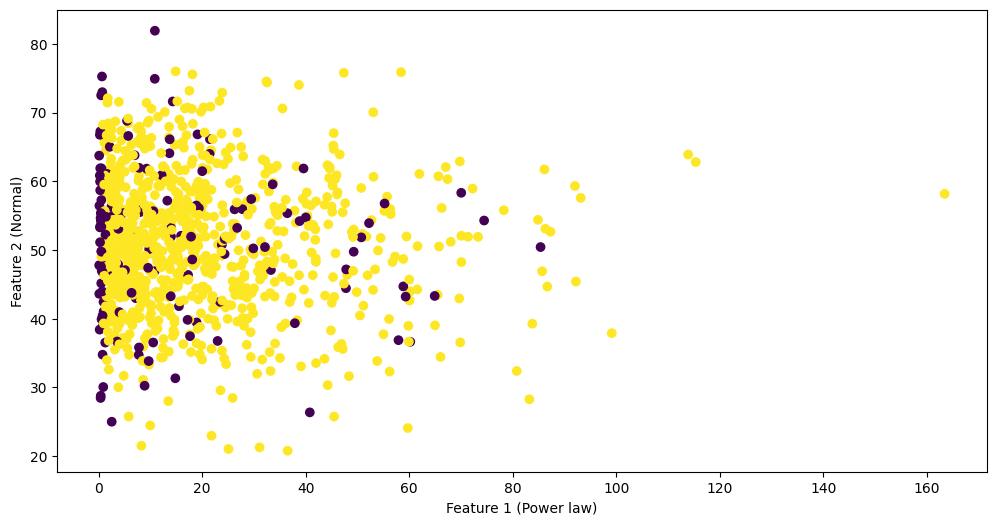

StandardScaler(exp feature) - Test Accuracy: 0.850


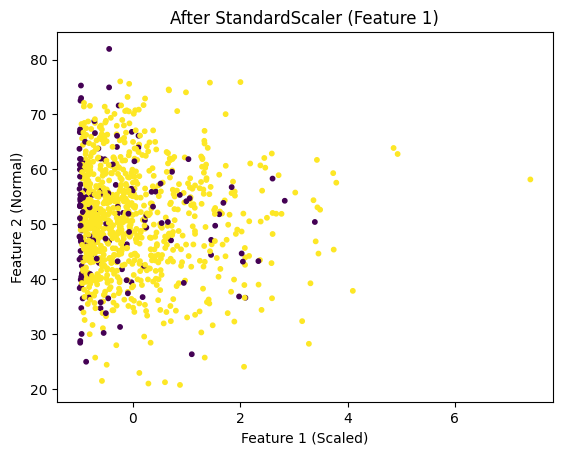

Log1p(exp feature) - Test Accuracy: 0.850


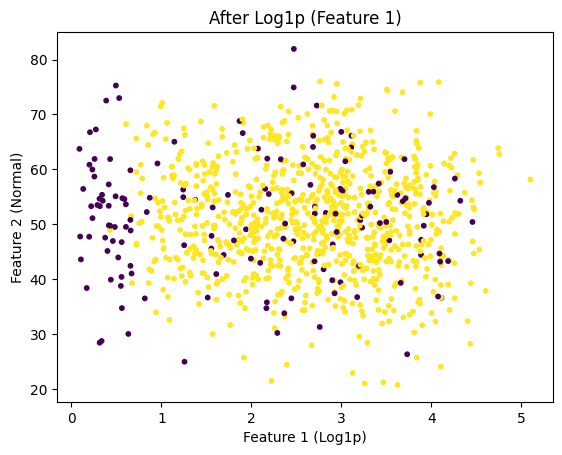

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt


# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]

from sklearn.pipeline import Pipeline
X = np.column_stack((X1,X2)) # KL

#split the data # KL this is too early
#x_scaled =x.copy ()
#x_scaled [:, 0] = np.loglp ()

# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define x_scaled here instead # KL
x_scaled=X.copy() # KL

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features KL
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()

# StandardScaler KL
x_scaled=X.copy()
scaler = StandardScaler()
x_scaled[:, 0] = scaler.fit_transform(X[:, [0]]).ravel()  # only scale col 0
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_s, y_train_s)
print(f"StandardScaler(exp feature) - Test Accuracy: {lr.score(X_test_s, y_test_s):.3f}")
x_scaled[:, 0] = scaler.fit_transform(X[:, [0]]).ravel()
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y, cmap='viridis', s=10)
plt.title("After StandardScaler (Feature 1)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Normal)")
plt.show()

# LogTransform KL
x_scaled=X.copy()
x_scaled[:, 0] = np.log1p(X[:, 0])   # log1p avoids -inf for zero
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_l, y_train_l)
print(f"Log1p(exp feature) - Test Accuracy: {lr.score(X_test_l, y_test_l):.3f}")
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y, cmap='viridis', s=10)
plt.title("After Log1p (Feature 1)")
plt.xlabel("Feature 1 (Log1p)")
plt.ylabel("Feature 2 (Normal)")
plt.show()

# Plot original features
#plt.figure(figsize=(12, 6))
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
#plt.xlabel('Feature 1 (Power law)')
#plt.ylabel('Feature 2 (Normal)')
#plt.show()


In [ ]:
#import matplotlib.pylot as plt
import matplotlib.pyplot as plt
import numpy as np
#plt.hist ()
#plt.hist() KL

TypeError: hist() missing 1 required positional argument: 'x'

#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

#df= pd. read_csv ("../data/titanic.csv")
df= pd.read_csv("../data/titanic.csv") #KL No spaces between actions
df.head()
# df.info()
df_clean = df[["pclass", "sex", "age", "sibsp", "parch", "survived"]].dropna(subset=["survived"])
df_clean.info()

#X = df_clean("survived", axis=1)
X = df_clean.drop(columns="survived") # Not sure about axis modifier? KL
X["sex"] = X["sex"].map({"male": 0, "female": 1}).astype(float) # Need to convert sex to integer KL
y = df_clean["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1) Fill Forward (ffill) --- KL
X_train_ffill = X_train.copy()
X_test_ffill = X_test.copy()
X_train_ffill["age"] = X_train_ffill["age"].ffill()
X_test_ffill["age"] = X_test_ffill["age"].ffill()

print("\n=== Fill Forward (ffill) ===")
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_ffill, y_train)
print("LogisticRegression accuracy:", lr.score(X_test_ffill, y_test))

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_ffill, y_train)
print("DecisionTree accuracy:", dt.score(X_test_ffill, y_test))

sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_ffill, y_train)
print("SGDClassifier accuracy:", sgd.score(X_test_ffill, y_test))

# --- 2) SimpleImputer with mean --- KL
prep_mean = ColumnTransformer(
    transformers=[
        ("age", SimpleImputer(strategy="mean"), ["age"]),
        ("rest", "passthrough", ["pclass", "sex", "sibsp", "parch"]),
    ]
)

print("\n=== SimpleImputer (mean) ===")
lr = Pipeline([("prep", prep_mean), ("clf", LogisticRegression(max_iter=1000))])
lr.fit(X_train, y_train)
print("LogisticRegression accuracy:", lr.score(X_test, y_test))

dt = Pipeline([("prep", prep_mean), ("clf", DecisionTreeClassifier(random_state=42))])
dt.fit(X_train, y_train)
print("DecisionTree accuracy:", dt.score(X_test, y_test))

sgd = Pipeline([("prep", prep_mean), ("clf", SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))])
sgd.fit(X_train, y_train)
print("SGDClassifier accuracy:", sgd.score(X_test, y_test))

# --- 3) SimpleImputer with most_frequent --- KL
prep_mode = ColumnTransformer(
    transformers=[
        ("age", SimpleImputer(strategy="most_frequent"), ["age"]),
        ("rest", "passthrough", ["pclass", "sex", "sibsp", "parch"]),
    ]
)

print("\n=== SimpleImputer (most_frequent) ===")
lr = Pipeline([("prep", prep_mode), ("clf", LogisticRegression(max_iter=1000))])
lr.fit(X_train, y_train)
print("LogisticRegression accuracy:", lr.score(X_test, y_test))

dt = Pipeline([("prep", prep_mode), ("clf", DecisionTreeClassifier(random_state=42))])
dt.fit(X_train, y_train)
print("DecisionTree accuracy:", dt.score(X_test, y_test))

sgd = Pipeline([("prep", prep_mode), ("clf", SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))])
sgd.fit(X_train, y_train)
print("SGDClassifier accuracy:", sgd.score(X_test, y_test))

# --- 4) KNNImputer on all features --- KL
print("\n=== KNNImputer ===")
lr = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("clf", LogisticRegression(max_iter=1000))
])
lr.fit(X_train, y_train)
print("LogisticRegression accuracy:", lr.score(X_test, y_test))

dt = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("clf", DecisionTreeClassifier(random_state=42))
])
dt.fit(X_train, y_train)
print("DecisionTree accuracy:", dt.score(X_test, y_test))

sgd = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("clf", SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))
])
sgd.fit(X_train, y_train)
print("SGDClassifier accuracy:", sgd.score(X_test, y_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   object 
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   survived  1309 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 61.5+ KB

=== Fill Forward (ffill) ===
LogisticRegression accuracy: 0.7748091603053435
DecisionTree accuracy: 0.7213740458015268
SGDClassifier accuracy: 0.7557251908396947

=== SimpleImputer (mean) ===
LogisticRegression accuracy: 0.767175572519084
DecisionTree accuracy: 0.7366412213740458
SGDClassifier accuracy: 0.7022900763358778

=== SimpleImputer (most_frequent) ===
LogisticRegression accuracy: 0.767175572519084
DecisionTree accuracy: 0.7404580152671756
SGDClassifier accuracy: 0.6946564885496184

=== KNNImputer ===
Log

#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [ ]:
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})

# Your code here
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ['color', 'target']

# Create the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(sample[categorical_cols])

# Convert to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with the numeric column(s)
final_df = pd.concat([encoded_df, sample[['yumminess']].reset_index(drop=True)], axis=1)

print(final_df)


   color_blue  color_green  color_red  target_apple  target_grass  \
0         0.0          0.0        1.0           1.0           0.0   
1         1.0          0.0        0.0           0.0           0.0   
2         0.0          1.0        0.0           0.0           1.0   
3         0.0          0.0        1.0           0.0           0.0   
4         1.0          0.0        0.0           0.0           0.0   
5         0.0          1.0        0.0           1.0           0.0   

   target_moon  target_sky  yumminess  
0          0.0         0.0         10  
1          0.0         1.0          2  
2          0.0         0.0          3  
3          0.0         1.0          1  
4          1.0         0.0          6  
5          0.0         0.0          9  


#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.

BONUS: See if you can figure out how to add SMOTE to the pipeline

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# -----------------------
# 1) Load data + quick EDA
# -----------------------
df = pd.read_csv("../data/synthetic_patient_data_unbalanced.csv")

# Ensure expected columns exist (will raise if missing)
expected = [
    "gender","age","bmi","systolic_bp","diastolic_bp","cholesterol_level",
    "exercise_frequency","smoker","family_history","diet_quality","us_state","has_disease"
]
missing_cols = [c for c in expected if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in CSV: {missing_cols}")

print("Shape:", df.shape)
print("\nClass balance (has_disease):")
print(df["has_disease"].value_counts(dropna=False, normalize=False))
print(df["has_disease"].value_counts(normalize=True).rename("proportion"))
print("\nMissing values per column:")
print(df[expected].isna().sum())

# -----------------------
# 2) Split features/target
# -----------------------
X = df.drop(columns=["has_disease"])
y = df["has_disease"].astype(int)

# -----------------------
# 3) Preprocessing
# -----------------------
# Define columns per type (treat smoker/family_history as categorical, per prompt)
numeric_cols = ["age","bmi","systolic_bp","diastolic_bp","cholesterol_level"]
categorical_cols = [
    "gender","exercise_frequency","smoker","family_history","diet_quality","us_state"
]

# Numeric: median impute + scale
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical: most_frequent impute + one-hot
# Note: newer sklearn uses sparse_output; to be version-safe, omit and accept sparse matrix.
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, numeric_cols),
        ("cat", categorical_pipe, categorical_cols),
    ],
    remainder="drop"
)

# -----------------------
# 4) Models to compare
# -----------------------
# Class imbalance hint: use class_weight='balanced' where it helps linear/tree models
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=None, random_state=42),
    "DecisionTree":       DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "SGDClassifier":      SGDClassifier(loss="log_loss", max_iter=2000, tol=1e-3, class_weight="balanced", random_state=42),
}
print("Step 4: Complete")
# -----------------------
# 5) Cross-validation setup
# -----------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",  # positive class = 1 by default
    "recall": "recall",
    "f1": "f1",
}
print("Step 5: Complete")
# -----------------------
# 6) Evaluate each model
# -----------------------
for name, clf in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("clf", clf)])
    cv_results = cross_validate(pipe, X, y, cv=cv, scoring=scoring, return_train_score=False)

    print(f"\n=== {name} (5-fold CV) ===")
    for metric in ["accuracy", "precision", "recall", "f1"]:
        scores = cv_results[f"test_{metric}"]
        print(f"{metric:9s}: {scores.mean():.3f} ± {scores.std():.3f}")
print("Step 6: Complete")

Shape: (1650, 15)

Class balance (has_disease):
has_disease
1    1500
0     150
Name: count, dtype: int64
has_disease
1    0.909091
0    0.090909
Name: proportion, dtype: float64

Missing values per column:
gender                  0
age                     0
bmi                   167
systolic_bp           164
diastolic_bp          161
cholesterol_level     165
exercise_frequency    163
smoker                165
family_history        141
diet_quality          170
us_state                0
has_disease             0
dtype: int64
Step 4: Complete
Step 5: Complete

=== LogisticRegression (5-fold CV) ===
accuracy : 0.850 ± 0.016
precision: 0.980 ± 0.003
recall   : 0.852 ± 0.015
f1       : 0.911 ± 0.010

=== DecisionTree (5-fold CV) ===
accuracy : 0.905 ± 0.005
precision: 0.952 ± 0.006
recall   : 0.943 ± 0.008
f1       : 0.947 ± 0.003

=== SGDClassifier (5-fold CV) ===
accuracy : 0.822 ± 0.036
precision: 0.980 ± 0.005
recall   : 0.821 ± 0.042
f1       : 0.893 ± 0.024
Step 6: Complete
